In [3]:
library(mlbench)
data(BreastCancer)
dataset <- BreastCancer[complete.cases(BreastCancer),]
print(dataset)

          Id Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size
1    1000025            5         1          1             1            2
2    1002945            5         4          4             5            7
3    1015425            3         1          1             1            2
4    1016277            6         8          8             1            3
5    1017023            4         1          1             3            2
6    1017122            8        10         10             8            7
7    1018099            1         1          1             1            2
8    1018561            2         1          2             1            2
9    1033078            2         1          1             1            2
10   1033078            4         2          1             1            2
11   1035283            1         1          1             1            1
12   1036172            2         1          1             1            2
13   1041801            5         3   

In [6]:
library(caret)
data(BreastCancer)
dataset <- BreastCancer[complete.cases(BreastCancer),]
dataset<-as.matrix(sapply(dataset[-1],as.numeric))
correlations <- cor(dataset[,-10])
hcorrelations <- findCorrelation(correlations,cutoff=0.85)
dataset <- dataset[,-hcorrelations]
print(dataset)

       Cl.thickness Cell.shape Marg.adhesion Epith.c.size Bare.nuclei
  [1,]            5          1             1            2           1
  [2,]            5          4             5            7          10
  [3,]            3          1             1            2           2
  [4,]            6          8             1            3           4
  [5,]            4          1             3            2           1
  [6,]            8         10             8            7          10
  [7,]            1          1             1            2          10
  [8,]            2          2             1            2           1
  [9,]            2          1             1            2           1
 [10,]            4          1             1            2           1
 [11,]            1          1             1            1           1
 [12,]            2          1             1            2           1
 [13,]            5          3             3            2           3
 [14,]            1 

In [8]:
library(e1071)
trainIndex<-sample(1:length(iris[,1]),100)
trainData<-iris[trainIndex,]
testData<-iris[-trainIndex,]
svm_model <- svm(Species ~ ., data=trainData,probability=TRUE)
pred <- predict(svm_model,testData[,-5])
probs_svm <- predict(svm_model,type="prob", testData[,-5],probability=TRUE)
table(pred,testData[,5])

            
pred         setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         19         0
  virginica       0          1        14

In [9]:
library(e1071)
trainIndex<-sample(1:length(iris[,1]),100)
trainData<-iris[trainIndex,]
testData<-iris[-trainIndex,]
nb_model <- naiveBayes(Species ~ ., data=trainData,probability=TRUE)
pred <- predict(nb_model,testData[,-5])
table(pred,testData[,5])

            
pred         setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         12         1
  virginica       0          3        16

In [11]:
library(party)
trainIndex<-sample(1:length(iris[,1]),100)
trainData<-iris[trainIndex,]
testData<-iris[-trainIndex,]
tree_model <- ctree(Species ~ ., data=trainData)
pred <- predict(tree_model,testData[,-5])
table(pred,testData[,5])

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


            
pred         setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         17         1
  virginica       0          0        14

In [12]:
library(rpart)
trainIndex<-sample(1:length(iris[,1]),100)
trainData<-iris[trainIndex,]
testData<-iris[-trainIndex,]
rp_model <- rpart(Species ~ ., data=trainData)
pred <- predict(rp_model,testData[,-5],type="class")
table(pred,testData[,5])

            
pred         setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         18         1
  virginica       0          1        18

In [14]:
library(party)
trainIndex<-sample(1:length(iris[,1]),100)
trainData<-iris[trainIndex,]
testData<-iris[-trainIndex,]
rf_model <- cforest(Species ~ ., data=trainData)
pred <- predict(rf_model, newdata=testData[,-5],)
table(pred,testData[,5])

Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):
“mtry is larger than ninputs, using mtry = inputs”Warning message in model@fit(data, ...):

            
pred         setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         19         2
  virginica       0          0        15

   
      1   2
  1 373  26
  2   9 175

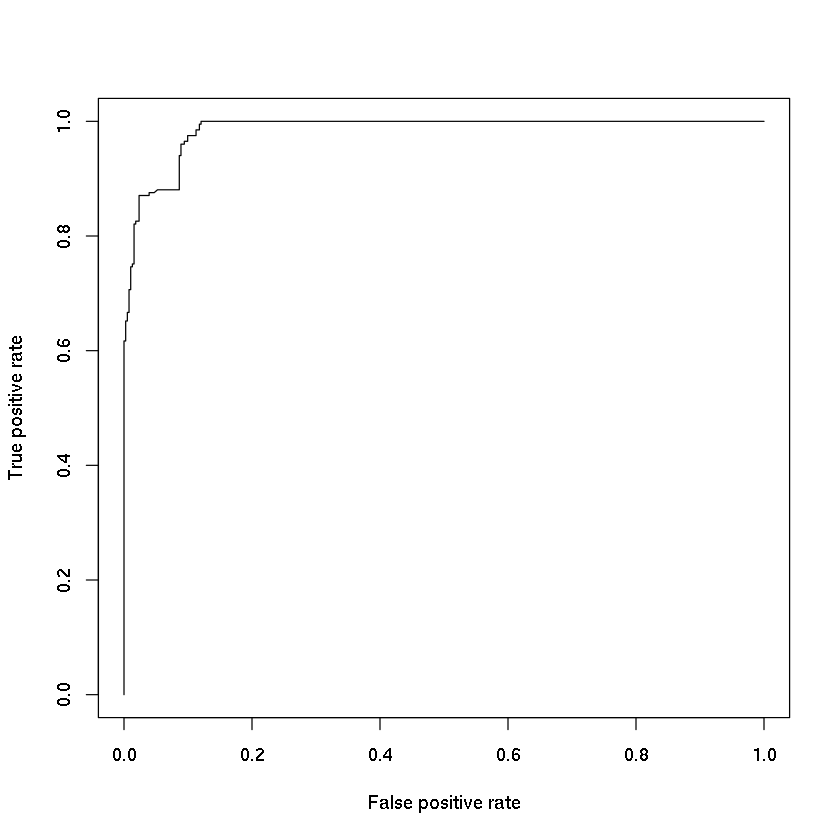

In [17]:
library(mlbench)
library(caret)
library(ROCR)
data(BreastCancer)
dataset <- BreastCancer[complete.cases(BreastCancer),]
dataset<-as.matrix(sapply(dataset[-1],as.numeric))
correlations <- cor(dataset[,-10])
hcorrelations <- findCorrelation(correlations,cutoff=0.85)
dataset <- as.data.frame(dataset[,-hcorrelations])
trainIndex<-sample(1:length(dataset[,1]),100)
trainData<-dataset[trainIndex,]
testData<-dataset[-trainIndex,]
rf_model <- cforest(Class ~ ., data=trainData)
pred <- predict(rf_model, newdata=as.data.frame(testData[,-9],))
probs <- pred-1
table(round(pred),testData[,9])
rocc<-prediction(probs,testData[,9]-1)
performance <- performance(rocc,"tpr","fpr")
plot(performance)